<a href="https://colab.research.google.com/github/SuhailHamid42/mlProjectYBIfoundation/blob/main/mlProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Title of Project**
Titanic Survival Prediction

2. **Objective**
To predict whether a passenger survived the Titanic disaster based on their characteristics such as age, sex, and passenger class.

3. **Data Source**
The Titanic dataset can be directly loaded from the seaborn library.

4. **Import Library**


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


5. **Import Data**

In [4]:
df = sns.load_dataset('titanic')


6. **Describe Data**

In [5]:
print(df.head())  # Show the first few rows of the dataset
print(df.describe())  # Summary statistics
print(df.isnull().sum())  # Check for missing values


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.3815

7. **Data Visualization**

<Axes: xlabel='survived', ylabel='count'>

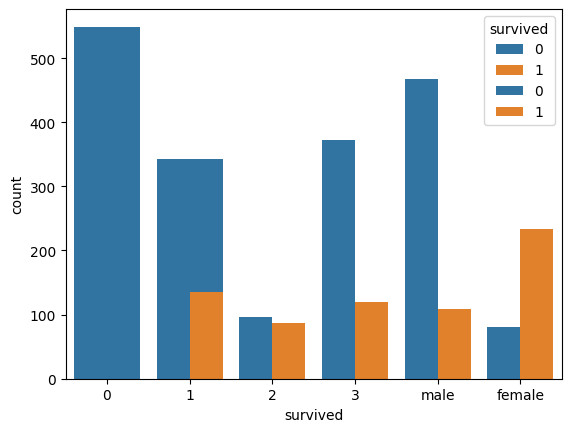

In [6]:
sns.countplot(x='survived', data=df)
sns.countplot(x='pclass', hue='survived', data=df)
sns.countplot(x='sex', hue='survived', data=df)


8. **Data Preprocessing**

In [7]:
df.drop(['deck', 'embark_town', 'alive'], axis=1, inplace=True)  # Drop less useful columns
df.dropna(inplace=True)  # Drop rows with missing values

# Convert categorical variables to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

X = df[['pclass', 'sex', 'age']]
y = df['survived']


9. **Define Target Variable (y) and Feature Variables (X)**

In [8]:
# X is already defined as the features, y as the target variable


10. **Train Test Split**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


11. **Modeling**

In [10]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

12. **Model Evaluation**

In [13]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7616822429906542


13. **Prediction**

In [14]:
sample = [[3, 0, 22.0]]  # Example: 3rd class, male, 22 years old
prediction = model.predict(sample)
print("Predicted survival:", "Survived" if prediction[0] else "Did not survive")


Predicted survival: Did not survive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
